<a href="https://colab.research.google.com/github/zahrahillini/18S191/blob/Fall20-franklin-output/All_files_Histograms_(Dorms_paper).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
if 'uploaded' in locals():
    del uploaded

In [ ]:
from google.colab import files
# This will prompt you to upload files
uploaded = files.upload()

# To read the uploaded files into pandas dataframes
import pandas as pd
import io

Saving fake_1.csv to fake_1.csv
Saving fake_2.csv to fake_2.csv
Saving fake_3.csv to fake_3.csv
Saving fake_4.csv to fake_4.csv
Saving fake_5.csv to fake_5.csv
Saving fake_6.csv to fake_6.csv
Saving fake_7.csv to fake_7.csv
Saving fake_8.csv to fake_8.csv
Saving fake_9.csv to fake_9.csv
Saving fake_10.csv to fake_10.csv
Saving fake_11.csv to fake_11.csv
Saving fake_12.csv to fake_12.csv
Saving fake_13.csv to fake_13.csv
Saving fake_14.csv to fake_14.csv
Saving fake_15.csv to fake_15.csv
Saving fake_16.csv to fake_16.csv
Saving fake_17.csv to fake_17.csv
Saving fake_18.csv to fake_18.csv
Saving fake_19.csv to fake_19.csv
Saving fake_20.csv to fake_20.csv
Saving fake_21.csv to fake_21.csv
Saving fake_22.csv to fake_22.csv
Saving fake_23.csv to fake_23.csv
Saving fake_24.csv to fake_24.csv
Saving fake_25.csv to fake_25.csv
Saving fake_26.csv to fake_26.csv
Saving fake_27.csv to fake_27.csv
Saving fake_28.csv to fake_28.csv
Saving fake_29.csv to fake_29.csv
Saving fake_30.csv to fake_30.cs

In [ ]:
#merging all the files together

real_df = pd.read_csv(io.BytesIO(uploaded['Real.csv']))
dfs = [real_df]

for i in range(1,60):
  dfs.append(pd.read_csv(io.BytesIO(uploaded[f'fake_{i}.csv'])))
merged_df = pd.concat(dfs, ignore_index = True)
print(merged_df.head())

   Unnamed: 0  Day of Week  Time of Day (hour)  Duration (mins)
0           0            4                  16         3.750000
1           1            4                  17         8.500000
2           2            4                  18        24.750000
3           3            4                  20         8.833333
4           4            4                  20        17.083333


<ipython-input-18-5cde8e9b2fd5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='Day of Week', ax=axes[0], palette='viridis')
<ipython-input-18-5cde8e9b2fd5>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='Time of Day (hour)', ax=axes[1], palette='viridis')


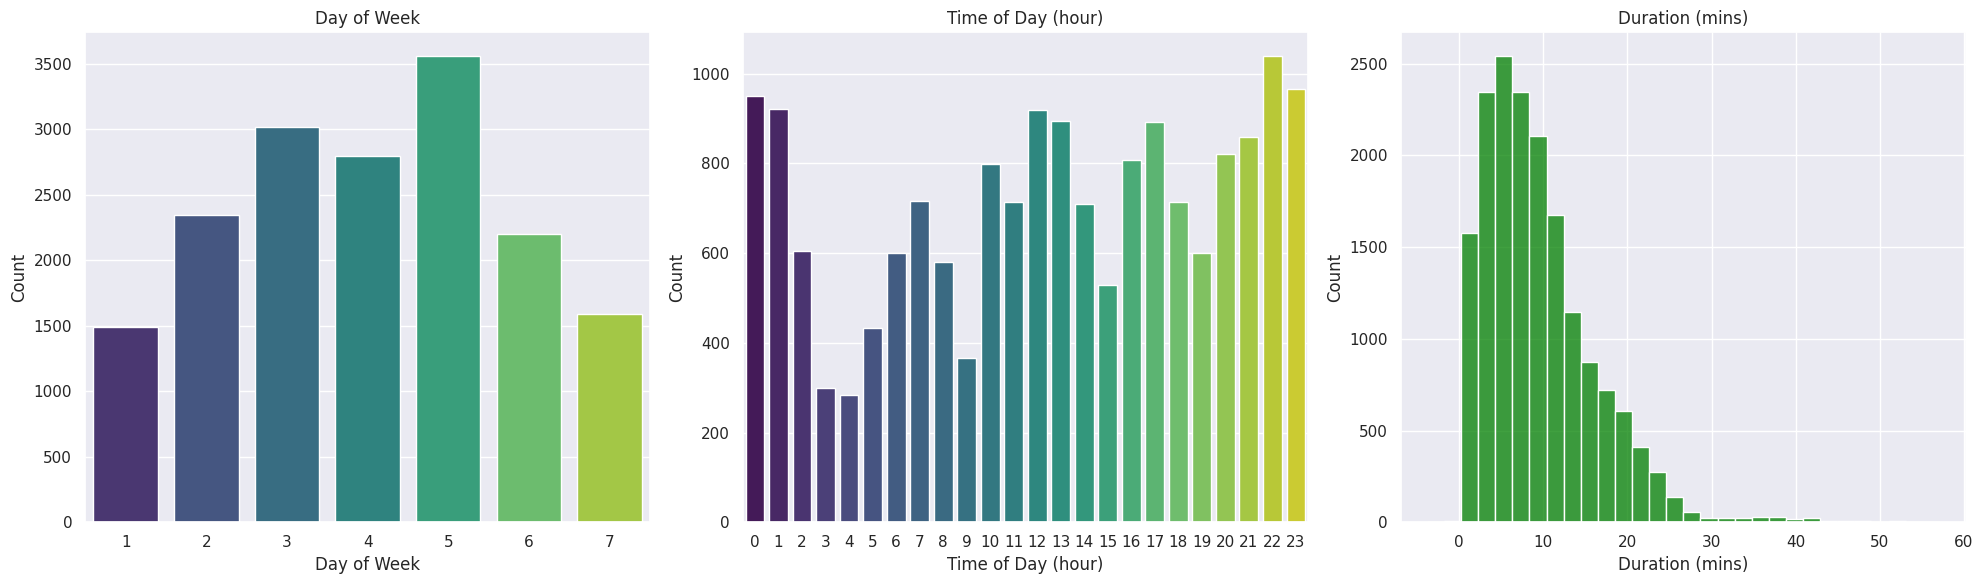

In [ ]:

import seaborn as sns
sns.set(style="darkgrid")
# Plot histograms directly without creating additional DataFrame
min_duration = merged_df['Duration (mins)'].min()
max_duration = merged_df['Duration (mins)'].max()
bin_width = 2
num_bins = int((max_duration - min_duration) / bin_width)

# Set up the figure
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot histogram for 'Day of Week'
sns.countplot(data=merged_df, x='Day of Week', ax=axes[0], palette='viridis')
axes[0].set_title('Day of Week')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Count')

# Plot histogram for 'Time of Day (hour)'
sns.countplot(data=merged_df, x='Time of Day (hour)', ax=axes[1], palette='viridis')
axes[1].set_title('Time of Day (hour)')
axes[1].set_xlabel('Time of Day (hour)')
axes[1].set_ylabel('Count')

# Plot histogram for 'Duration (mins)' with bin width of 2 minutes
sns.histplot(data=merged_df, x='Duration (mins)', bins=num_bins, ax=axes[2], color='green')
axes[2].set_title('Duration (mins)')
axes[2].set_xlabel('Duration (mins)')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
merged_df.to_csv('all_dormdata.csv')
files.download('all_dormdata.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
percentile_80 = merged_df['Duration (mins)'].quantile(0.9)

# Print the 90th percentile value
print("90th percentile for Duration (mins):", percentile_80)

90th percentile for Duration (mins): 18.46019220382351


<ipython-input-22-bc76a4c48d0a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_durations_df['Day of Week'] = long_durations_df['Day of Week'].map(day_mapping)


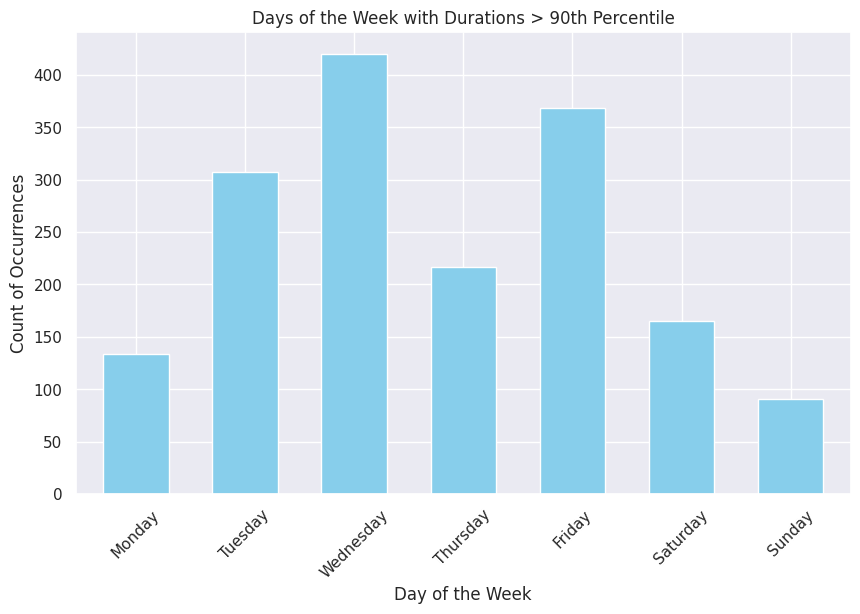

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming all_dfs is your DataFrame
# Filter to include only durations longer than the 90th percentile
long_durations_df = merged_df[merged_df['Duration (mins)'] > 18.46019220382351]

# Adjusting mapping according to the day numbering, with 1=Monday and 7=Sunday
day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
long_durations_df['Day of Week'] = long_durations_df['Day of Week'].map(day_mapping)

# Group by 'Day of Week' and count occurrences
day_counts = long_durations_df['Day of Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar', color='skyblue', width=0.6)  # Adjusted the width to 0.6
plt.title('Days of the Week with Durations > 90th Percentile')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Occurrences')
plt.xticks(rotation=45)
plt.savefig('dow.pdf')
plt.show()

In [ ]:
Andrea = files.upload()

Saving hisValues_Duration.csv to hisValues_Duration.csv
Saving hisValues_TOD.csv to hisValues_TOD.csv
Saving hisValues_DOW.csv to hisValues_DOW.csv


In [ ]:
Reuse_d = pd.read_csv(io.BytesIO(Andrea['hisValues_Duration.csv']))
Reuse_dow = pd.read_csv(io.BytesIO(Andrea['hisValues_DOW.csv']))
Reuse_tod = pd.read_csv(io.BytesIO(Andrea['hisValues_Duration.csv']))

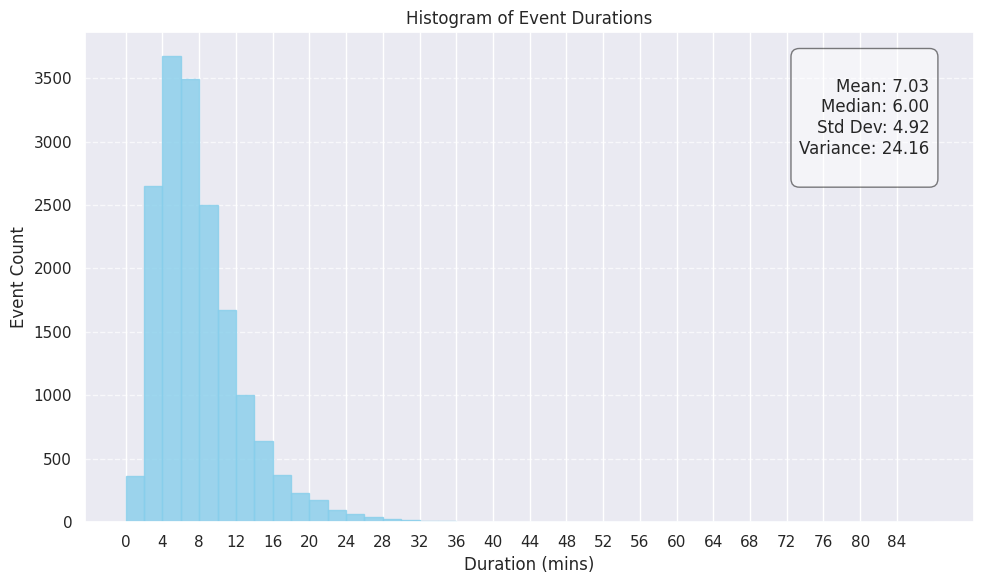

In [ ]:
import numpy as np

histogram_data = Reuse_d.copy()
mean = np.mean(histogram_data['Bin Edges'].repeat(histogram_data['Event count']))
median = np.median(histogram_data['Bin Edges'].repeat(histogram_data['Event count']))
std_dev = np.std(histogram_data['Bin Edges'].repeat(histogram_data['Event count']))
variance = np.var(histogram_data['Bin Edges'].repeat(histogram_data['Event count']))

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(histogram_data['Bin Edges'], histogram_data['Event count'], width=2, align='edge', color='skyblue', edgecolor='skyblue', alpha =0.8)
plt.title('Histogram of Event Durations')
plt.xlabel('Duration (mins)')
plt.ylabel('Event Count')
plt.xticks(range(0, 88, 4))  # Adjust the x-ticks to show every 4 minutes for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add statistics box in the upper right corner
stats_text = f'''
Mean: {mean:.2f}
Median: {median:.2f}
Std Dev: {std_dev:.2f}
Variance: {variance:.2f}
'''
plt.gca().text(0.95, 0.95, stats_text, fontsize=12, verticalalignment='top', horizontalalignment='right',
               bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white', alpha=0.5), transform=plt.gca().transAxes)

plt.tight_layout()

# Save the plot to a file
#plt.savefig('Figure 10.pdf')

# Show the plot
plt.show()

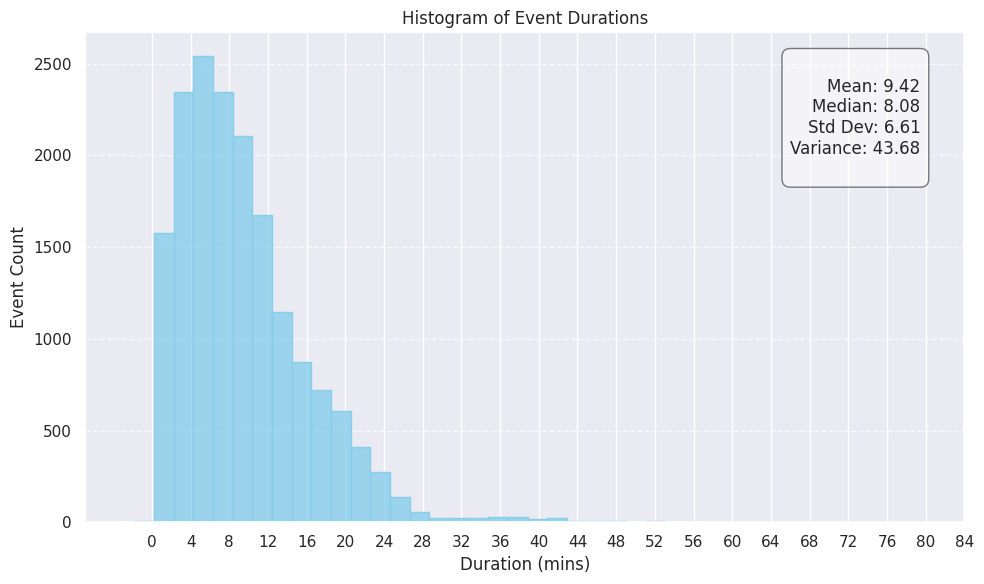

In [ ]:
min_duration = merged_df['Duration (mins)'].min()
max_duration = merged_df['Duration (mins)'].max()
bin_width = 2
num_bins = int((max_duration - min_duration) / bin_width)

# Calculate statistics
histogram_data = merged_df[['Duration (mins)']].copy()
histogram_data['Event count'] = histogram_data.groupby('Duration (mins)').cumcount() + 1
mean = np.mean(histogram_data['Duration (mins)'])
median = np.median(histogram_data['Duration (mins)'])
std_dev = np.std(histogram_data['Duration (mins)'])
variance = np.var(histogram_data['Duration (mins)'])

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='Duration (mins)', bins=num_bins, color='skyblue', edgecolor='skyblue', alpha = 0.8)
plt.title('Histogram of Event Durations')
plt.xlabel('Duration (mins)')
plt.ylabel('Event Count')
#plt.xticks(range(0, int(max_duration) + 4, 4))  # Adjust the x-ticks to show every 4 minutes for better readability
plt.xticks(range(0, 88, 4))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add statistics box in the upper right corner
stats_text = f'''
Mean: {mean:.2f}
Median: {median:.2f}
Std Dev: {std_dev:.2f}
Variance: {variance:.2f}
'''
plt.gca().text(0.95, 0.95, stats_text, fontsize=12, verticalalignment='top', horizontalalignment='right',
               bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white', alpha=0.5), transform=plt.gca().transAxes)

plt.tight_layout()

# Save the plot to a file
# plt.savefig('Figure 10.pdf')

# Show the plot
plt.show()